# 迴歸問題

## 郭耀仁

## 迴歸問題有哪些？

- 利用月收入來核定信用卡額度
- 利用坪數、房間數來預測房價
- 利用每日最高氣溫來預測飲料店的冰紅茶銷量
- ...etc.

## 大家都在尋找 $f$

$$y = f(x)$$

- 但沒有人知道 $f$ 到底為何、是否存在？我們只能假設：

$$\hat{y} = h(x)$$

## 當 $\hat{y}$ 與 $y$ 之間的差異愈小，我們更有自信地說 $h$ 跟 $f$ 愈相似

- 成本函數

$$ \text{minimize:} \frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-y_i)^2$$

## 將 $h$ 表示得更完整：只有一個觀測值的時候

$$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- 假如我們令 $x_0 = 1$，就可以將式子廣義地表示為：

$$\hat{y} = h(x) = \begin{bmatrix} \theta_0 & \theta_1 & ... & \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\.\\.\\.\\ x_n \end{bmatrix} = \theta^{T}x$$

## 將 $h$ 表示得更完整：有 m 個觀測值的時候

$$\hat{y} = h(X) = 
\begin{bmatrix} x_{01}, x_{02}, ..., x_{0n} \\ x_{11}, x_{12}, ..., x_{1n} \\.\\.\\.\\ x_{m1}, x_{m2}, ..., x_{mn}
\end{bmatrix}
\begin{bmatrix} \theta_0 \\ \theta_1 \\.\\.\\.\\ \theta_n \end{bmatrix} = X\theta$$

## 玩具資料


$$
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3])
y = np.array([2, 2, 4])
plt.scatter(x, y, color='k')
plt.xlim(0, 4)
plt.ylim(0.5, 5)

(0.5, 5)

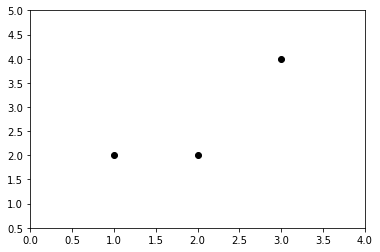

In [2]:
plt.show()

## 任務

- 找到一組 $\theta$ 讓成本函數最小化

In [3]:
x_train = np.array([1, 2, 3])
X_train = x_train.reshape(len(x_train), 1)
y_train = np.array([2, 2, 4])
Y_train = y_train.reshape(len(y_train), 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
LHS = np.dot(np.transpose(X_train), X_train)
RHS = np.dot(np.transpose(X_train), Y_train)
thetas = np.dot(np.linalg.inv(LHS), RHS)
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]

f = lambda x : theta_0 + theta_1*x
xfit = np.arange(0,4,0.01)
yfit = f(xfit)

plt.plot(x_train, y_train, 'ko', xfit, yfit)
plt.xlabel('x')
plt.ylabel('y')

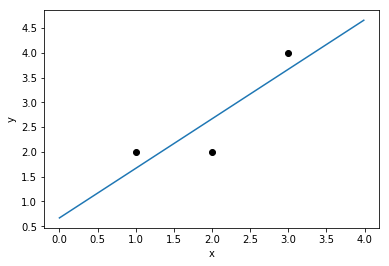

In [4]:
plt.show()

## 完成任務的方法

- Normal Equation
- Gradient Descent

## Normal Equation

## 線性聯立方程組

\begin{eqnarray}
\theta_0 + \theta_1 &=& 2 \nonumber \\
\theta_0 + 2 \theta_1 &=& 2 \nonumber \\
\theta_0 + 3 \theta_1 &=& 4 \nonumber \\
\end{eqnarray}

## 以向量與矩陣表示

\begin{equation}
X = \begin{bmatrix}
1 & 1\\
1 & 2\\
1 & 3
\end{bmatrix}, \quad
\theta = \begin{bmatrix}
\theta_0 \\
\theta_1 
\end{bmatrix}, \quad \mathrm{and} 
\quad y = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}
\end{equation}

## 如果 $X^TX$ 可逆

\begin{eqnarray}
X\theta = y \\
\theta = (X^T X)^{-1} X^T y
\end{eqnarray}

## 獲得 $\theta$ 的推導過程源自於成本函數的最小化

\begin{eqnarray}
\text{minimize:} \frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-y_i)^2 \\
\text{minimize:} J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y) \\
\text{minimize:} J(\theta) = \frac{1}{2m}[(X\theta)^T - y^T)(X\theta - y)] \\
\text{minimize:} J(\theta) = \frac{1}{2m}[(X\theta)^TX\theta - (X\theta)^Ty - y^T(X\theta) + y^Ty] \\
\text{minimize:} J(\theta) = \frac{1}{2m}[\theta^TX^TX\theta - 2(X\theta)^Ty + y^Ty] \\
\frac{\partial J}{\partial \theta} = \frac{1}{2m}[2X^TX\theta - 2X^Ty] = 0 \\
X^TX\theta = X^Ty \\
\theta = (X^T X)^{-1} X^T y
\end{eqnarray}

In [5]:
import numpy as np

x_train = np.array([1, 2, 3])
X_train = x_train.reshape(len(x_train), 1)
X_train

array([[1],
       [2],
       [3]])

In [6]:
y_train = np.array([2, 2, 4])
y_train = y_train.reshape(len(y_train), 1)
y_train

array([[2],
       [2],
       [4]])

In [7]:
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
X_train

array([[1., 1.],
       [1., 2.],
       [1., 3.]])

In [8]:
LHS = np.dot(np.transpose(X_train), X_train)
RHS = np.dot(np.transpose(X_train), y_train)

In [9]:
thetas = np.dot(np.linalg.inv(LHS), RHS)
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]
print("讓成本函數最小的 Theta")
print("Theta_0:{:.4f}, Theta_1:{:.4f}".format(theta_0, theta_1))

讓成本函數最小的 Theta
Theta_0:0.6667, Theta_1:1.0000


## 隨堂練習：將利用 Normal Equation 求解的過程寫成函數

```python
def simple_linear_regression_fit(x, y):
    # ...
```

## 隨堂練習：利用 simple_linear_regression_fit() 求解後將 $y = \theta_0 + \theta_1x$ 畫出

In [10]:
x_train = np.array([1, 2, 3])
X_train = x_train.reshape(len(x_train), 1)
y_train = np.array([2, 2, 4])
Y_train = y_train.reshape(len(y_train), 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
LHS = np.dot(np.transpose(X_train), X_train)
RHS = np.dot(np.transpose(X_train), Y_train)
thetas = np.dot(np.linalg.inv(LHS), RHS)
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]

f = lambda x : theta_0 + theta_1*x
xfit = np.arange(0,4,0.01)
yfit = f(xfit)

plt.plot(x_train, y_train, 'ko', xfit, yfit)
plt.xlabel('x')
plt.ylabel('y')

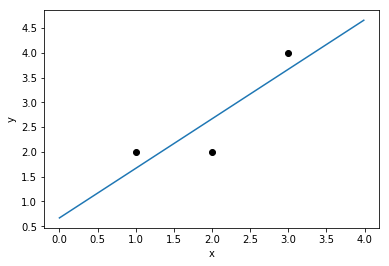

In [11]:
plt.show()

## Gradient Descent

## $h(x)$：

$$h(x) = \theta_0 + \theta_1x_1$$

## 先簡化成只有 $\theta_1$：

$$h(x) = \theta_1x_1$$

## 在 $0 < \theta_1 < 2$ 之間打點來計算成本函數 $J(\theta_1)$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.scatter(theta_1_arr, cost_arr, marker = 'x')
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("Cost Function Visualized")

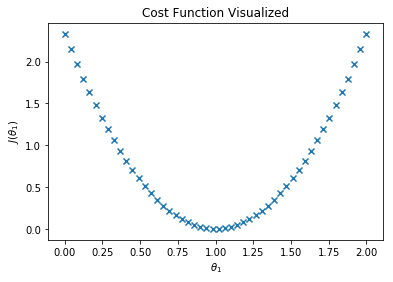

In [13]:
plt.show()

## 假如我們的運氣不好，在一個沒有包含 $\theta_1$ 的區間尋找怎麼辦？

## 透過很聰明的方式：Gradient Descent

> 每組 $\theta$ 所得的成本函數偏微分取得斜率，利用這個斜率逐步取得局部最佳解。

$$
\text{minimize:} J(\theta) = \frac{1}{2m}[\theta^TX^TX\theta - 2(X\theta)^Ty + y^Ty] \\
\frac{\partial J}{\partial \theta} = \frac{1}{2m}[2X^TX\theta - 2X^Ty] = 0 \\
\theta := \theta - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta} J(\theta) \\
\theta := \theta - \alpha \frac{1}{m}(X^TX\theta - X^Ty) \\
\theta := \theta - \alpha \frac{1}{m}[X^T(X\theta - y)]
$$

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.scatter(theta_1_arr, cost_arr, marker = 'x')
plt.plot(1.75, cost_function(1.75, x, y), marker = 'D', markersize = 12, color = 'y')
plt.plot(0.5, cost_function(0.5, x, y), marker = 'o', markersize = 12, color = 'g')
plt.plot(1, cost_function(1, x, y), marker = '^', markersize = 12, color = 'r')
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.xticks([]), plt.yticks([])
plt.title("Gradient Descent with $\\theta_1$")

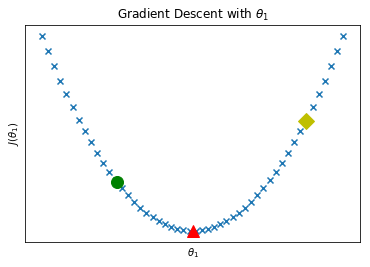

In [15]:
plt.show()

## 如何做修正

- $\theta_1 = 0.5$ 的時候（綠圓點），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為負值，所以 $\theta_1$ 會向右邊修正
- $\theta_1 = 1.75$ 的時候（黃方塊），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為正值，所以 $\theta_1$ 會向左邊修正
- $\theta_1 = 1.0$ 的時候（紅三角），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為零，$\theta_1$ 收斂

## $\theta_1$ 修正的速度與 $\alpha$ 相關，$\alpha$ 稱為學習速率

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.1, 1, 15)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r', lw = 0)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.xticks([]), plt.yticks([])
plt.title("Optimal Gradient Descent")

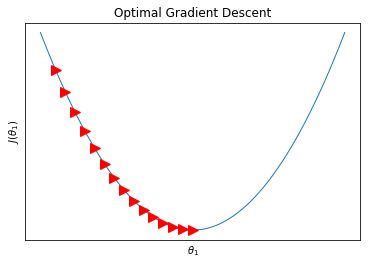

In [17]:
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.05, 1, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 6, color = 'r')
plt.xticks([]), plt.yticks([])
plt.xlabel("Number of iterations")
plt.ylabel("$J(\\theta_1)$")
plt.title("$\\alpha$ is too small")

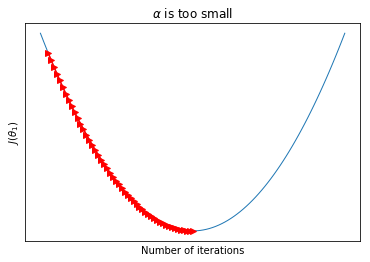

In [19]:
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.array((0.75, 1.5, 0.25, 1.8, 0.1))
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r')
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.xticks([]), plt.yticks([])
plt.title("$\\alpha$ is too large")

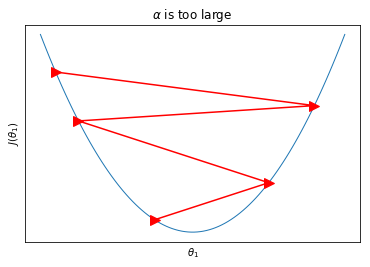

In [21]:
plt.show()

## 怎麼挑選學習速率

- 如果學習速率夠小，成本函數每一次都會下降
- 學習速率太小，收斂的速度太慢
- 學習速率太大，可能會無法收斂

In [22]:
import numpy as np

def compute_cost(X, y, thetas = np.array([0, 0]).reshape(2, 1)):
    m = y.shape[0]
    h = X.dot(thetas)
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [23]:
x_train = np.array([1, 2, 3])
X_train = x_train.reshape(len(x_train), 1)
y_train = np.array([2, 2, 4])
y_train = y_train.reshape(len(y_train), 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)

compute_cost(X_train, y_train)

4.0

In [24]:
def gradient_descent(X, y, alpha=0.01, num_iters=1500):
    thetas = np.array([0, 0]).reshape(2, 1)
    m = y.shape[0]
    J_history = np.zeros(num_iters)
    
    for num_iter in range(num_iters):
        h = X.dot(thetas)
        loss = h - y
        gradient = X.T.dot(loss) / m
        thetas = thetas - alpha * gradient
        J_history[num_iter] = compute_cost(X, y, thetas=thetas)
    return thetas, J_history

In [25]:
import numpy as np

X_train = np.array([1, 2, 3])
X_train = X_train.reshape(len(X_train), 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)

thetas , cost_J = gradient_descent(X_train, y_train)
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]
print("讓成本函數最小的 Thetas")
print("Theta_0:{:.4f}, Theta_1:{:.4f}".format(theta_0, theta_1))
plt.plot(cost_J)
plt.ylabel(r"$J(\theta)$")
plt.xlabel('Iterations')

讓成本函數最小的 Thetas
Theta_0:0.6354, Theta_1:1.0138


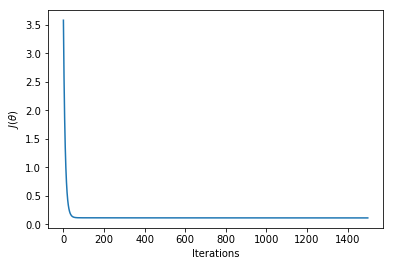

In [26]:
plt.show()

In [27]:
from mpl_toolkits.mplot3d import Axes3D

def surface_plot(theta0_range, theta1_range, X, y):
    theta0_start, theta0_end = theta0_range
    theta1_start, theta1_end = theta1_range
    length = 50
    theta0_arr = np.linspace(theta0_start, theta0_end, length)
    theta1_arr = np.linspace(theta1_start, theta1_end, length)
    Z = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            theta_0 = theta0_arr[i]
            theta_1 = theta1_arr[j]
            thetas_arr = np.array([theta_0, theta_1]).reshape(-1, 1)
            Z[i, j] = compute_cost(X, y, thetas=thetas_arr)
    xx, yy = np.meshgrid(theta0_arr, theta1_arr, indexing='xy')

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z, alpha=0.6, cmap=plt.cm.jet)
    ax.set_zlabel('Cost')
    ax.set_zlim(Z.min(),Z.max())
    #ax.view_init(elev=15, azim=230)
    ax.set_xticks(np.linspace(theta0_start, theta0_end, 5))
    ax.set_yticks(np.linspace(theta1_start, theta1_end, 5))
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_title("Cost function during gradient descent")
    plt.show()

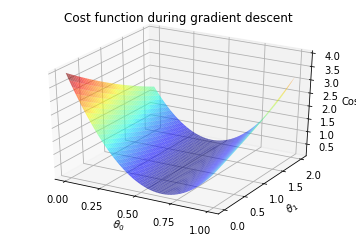

In [28]:
surface_plot((0, 1), (0, 2), X_train, y_train)

## Phew...

- 總算完成了兩種找到 $\theta$ 的方式！
- 這是不能忽略的學習步驟，但並不是實作上要採用的

## 有哪些模組可以幫我們找到 $\theta$

- [statsmodel](https://www.statsmodels.org/stable/index.html)
- [scikit-learn](http://scikit-learn.org/stable/)
- [TensorFlow](https://www.tensorflow.org/)

## statsmodel

In [29]:
print(X_train)
print(y_train)

[[1. 1.]
 [1. 2.]
 [1. 3.]]
[[2]
 [2]
 [4]]


In [30]:
import statsmodels.api as sm

regressor_sm = sm.OLS(y_train, X_train)
thetas_sm = regressor_sm.fit()
theta_0_sm = thetas_sm.params[0]
theta_1_sm = thetas_sm.params[1]

print("Thetas from statsmodel:")
print("theta_0:{:.4f}, theta_1:{:.4f}".format(theta_0_sm, theta_1_sm))

Thetas from statsmodel:
theta_0:0.6667, theta_1:1.0000


/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## scikit-learn

In [31]:
print(X_train)
print(y_train)

[[1. 1.]
 [1. 2.]
 [1. 3.]]
[[2]
 [2]
 [4]]


In [32]:
from sklearn import linear_model

regressor_skl = linear_model.LinearRegression()
thetas_skl = regressor_skl.fit(X_train, y_train)
theta_0_skl = thetas_skl.intercept_
theta_1_skl = thetas_skl.coef_[0]

print("Thetas from scikit-learn:")
print("theta_0:{:.4f}, theta_1:{:.4f}".format(theta_0_skl[0], theta_1_skl[1]))

Thetas from scikit-learn:
theta_0:0.6667, theta_1:1.0000


## TensorFlow

In [33]:
import tensorflow as tf
import numpy as np

data = np.array([
    [1, 2],
    [2, 2],
    [3, 4]
])
X_train = tf.placeholder(tf.float32, name="X_train")
y_train = tf.placeholder(tf.float32, name="y_train")
theta_1 = tf.Variable(0.0, name="weights")
theta_0 = tf.Variable(0.0, name="bias")
y_hat = X_train * theta_1 + theta_0
loss = tf.square(y_train - y_hat, name="loss")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1500):
        for X, y in data:
            sess.run(optimizer, feed_dict={X_train: X, y_train: y})
    theta_1_tf, theta_0_tf = sess.run([theta_1, theta_0])

In [34]:
print("Thetas from TensorFlow:")
print("theta_0:{:.4f}, theta_1:{:.4f}".format(theta_0_tf, theta_1_tf))

Thetas from TensorFlow:
theta_0:0.6127, theta_1:1.0352


## 我們建議使用 Scikit-Learn

- 比 StatsModel 完整
- TensorFlow 是自成一格的框架

## 迴歸問題與房屋價格資料

## House Prices: Advanced Regression Techniques

<https://www.kaggle.com/c/house-prices-advanced-regression-techniques>

In [35]:
import pandas as pd

train_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/train.csv"
test_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/test.csv"
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [36]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 什麼是訓練（train）樣本？

- 訓練樣本用來建立 $h(x)$
- 訓練樣本是 labeled data

## 什麼是驗證（validation）樣本？

- 由訓練樣本中切割出來
    - 通常分出 30% 作為驗證樣本
- 驗證樣本投入 $h(x)$ 產出預測值 $\hat{y}$
- 比對驗證樣本的 $y$ 與 $\hat{y}$ 來評估 $h(x)$ 的績效（performance）

## 什麼是測試（test）樣本？

- 測試樣本是 unlabeled data
- 將測試樣本投入 $h(x)$ 建立預測 $\hat{y}$
- 事後量測績效

## 挑一個變數來預測 SalePrice

- 從 Correlation Matrix 中來找一個變數

In [38]:
train.corr()["SalePrice"].abs().sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [39]:
import matplotlib.pyplot as plt

train.plot.scatter("GrLivArea", "SalePrice", s=5)

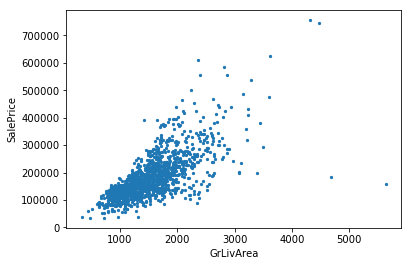

In [40]:
plt.show()

In [41]:
# 切割訓練與驗證樣本
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(train, test_size=0.3, random_state=123)
print(train.shape)
print(train_df.shape)
print(validation_df.shape)

(1460, 81)
(1022, 81)
(438, 81)


In [42]:
import numpy as np

# 訓練樣本
y_train = train_df["SalePrice"].values.reshape(train_df.shape[0], 1)
X_train = train_df["GrLivArea"].values.reshape(train_df.shape[0], 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
print(y_train.shape)
print(X_train.shape)

(1022, 1)
(1022, 2)


In [43]:
# 驗證樣本
y_validation = validation_df["SalePrice"].values.reshape(validation_df.shape[0], 1)
X_validation = validation_df["GrLivArea"].values.reshape(validation_df.shape[0], 1)
m = X_validation.shape[0]
ones_col = np.ones((m, 1))
X_validation = np.concatenate((ones_col, X_validation), axis=1)
print(y_validation.shape)
print(X_validation.shape)

(438, 1)
(438, 2)


## 隨堂練習：自己來切割訓練、驗證樣本

- Random seed
- Shuffle
- Subset

```python
def my_train_test_split(train, test_size=0.3, random_state=123)
    # ...
```

In [44]:
# sklearn
from sklearn import linear_model

regressor_skl = linear_model.LinearRegression()
regressor_skl.fit(X_train, y_train)
theta_0_skl = regressor_skl.intercept_[0]
theta_1_skl = regressor_skl.coef_[0][1]
print('Thetas from sklearn:\ntheta_0: {:.4f}\ntheta_1: {:.4f}'.format(theta_0_skl, theta_1_skl))

Thetas from sklearn:
theta_0: 21905.1315
theta_1: 104.0985


In [45]:
import matplotlib.pyplot as plt

y_hat = regressor_skl.predict(X_validation)
plt.scatter(X_validation[:, 1], y_validation, color="black", s=5)
plt.plot(X_validation[:, 1], y_hat, color="blue")
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

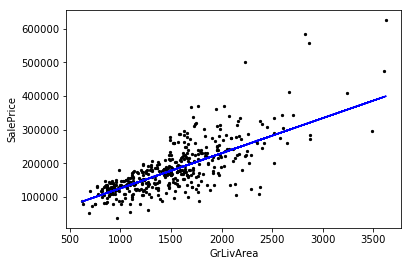

In [46]:
plt.show()

## 評估迴歸模型的指標

- MSE（愈低愈好）

$$MSE = \frac{1}{N}\sum_{i=1}^N(\hat{y_i} - y_i) ^ 2$$

In [47]:
from sklearn.metrics import mean_squared_error

train_MSE= np.mean((y_train - regressor_skl.predict(X_train))**2)
validation_MSE= np.mean((y_validation - regressor_skl.predict(X_validation))**2)
print("Computation:")
print("Training MSE: {:.4f}".format(train_MSE))
print("Validation MSE: {:.4f}".format(validation_MSE))

# sklearn.metrics
print("\nFrom sklearn.metrics:")
print("Training MSE: {:.4f}".format(mean_squared_error(y_train, regressor_skl.predict(X_train))))
print("Validation MSE: {:.4f}".format(mean_squared_error(y_validation, regressor_skl.predict(X_validation))))

Computation:
Training MSE: 3402166887.1990
Validation MSE: 2541490406.3163

From sklearn.metrics:
Training MSE: 3402166887.1990
Validation MSE: 2541490406.3163


## 隨堂練習：挑兩個變數來預測 SalePrice

- 試試看 `GrLivArea` 與 `GarageArea`

In [48]:
import matplotlib.pyplot as plt

train.plot.scatter("GarageArea", "SalePrice", s=5)

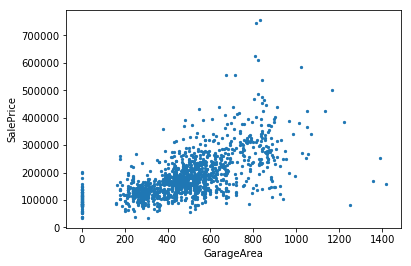

In [49]:
plt.show()

In [50]:
# 訓練樣本
y_train = train_df["SalePrice"].values.reshape(train_df.shape[0], 1)
X_train = train_df[["GrLivArea", "GarageArea"]].values.reshape(train_df.shape[0], 2)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
print(y_train.shape)
print(X_train.shape)

(1022, 1)
(1022, 3)


In [51]:
# 驗證樣本
y_validation = validation_df["SalePrice"].values.reshape(validation_df.shape[0], 1)
X_validation = validation_df[["GrLivArea", "GarageArea"]].values.reshape(validation_df.shape[0], 2)
m = X_validation.shape[0]
ones_col = np.ones((m, 1))
X_validation = np.concatenate((ones_col, X_validation), axis=1)
print(y_validation.shape)
print(X_validation.shape)

(438, 1)
(438, 3)


In [52]:
# sklearn
from sklearn import linear_model

regressor_skl = linear_model.LinearRegression()
regressor_skl.fit(X_train, y_train)
theta_0_skl = regressor_skl.intercept_[0]
theta_1_skl = regressor_skl.coef_[0][1]
theta_2_skl = regressor_skl.coef_[0][2]

In [53]:
print('Thetas from sklearn:\ntheta_0: {:.4f}\ntheta_1: {:.4f}\ntheta_2: {:.4f}'.format(theta_0_skl, theta_1_skl, theta_2_skl))

Thetas from sklearn:
theta_0: -4600.3771
theta_1: 77.7825
theta_2: 142.7484


In [54]:
from sklearn.metrics import mean_squared_error

train_MSE= np.mean((y_train - regressor_skl.predict(X_train))**2)
validation_MSE= np.mean((y_validation - regressor_skl.predict(X_validation))**2)

In [55]:
print("Computation:")
print("Training MSE: {:.4f}".format(train_MSE))
print("Validation MSE: {:.4f}".format(validation_MSE))

# sklearn.metrics
print("\nFrom sklearn.metrics:")
print("Training MSE: {:.4f}".format(mean_squared_error(y_train, regressor_skl.predict(X_train))))
print("Validation MSE: {:.4f}".format(mean_squared_error(y_validation, regressor_skl.predict(X_validation))))

Computation:
Training MSE: 2682062423.1890
Validation MSE: 1930533819.9319

From sklearn.metrics:
Training MSE: 2682062423.1890
Validation MSE: 1930533819.9319


## 使用有 d 次項的 X 來建立 h

In [56]:
import matplotlib.pyplot as plt

train.plot.scatter("YearBuilt", "SalePrice", s=5)

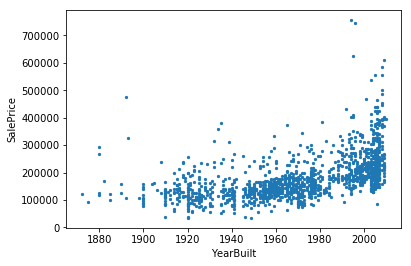

In [57]:
plt.show()

$$ y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + ... + \theta_d x_i^d $$

In [58]:
# 訓練樣本
y_train = train_df["SalePrice"].values.reshape(-1, 1)
X_train = train_df["YearBuilt"].values.reshape(-1, 1)
print(y_train.shape)
print(X_train.shape)

(1022, 1)
(1022, 1)


In [59]:
# 驗證樣本
y_validation = validation_df["SalePrice"].values.reshape(-1, 1)
X_validation = validation_df["YearBuilt"].values.reshape(-1, 1)
print(y_validation.shape)
print(X_validation.shape)

(438, 1)
(438, 1)


## 使用 `PolynomialFeatures(d)` 與 `fit_transform()` 建立 X

In [60]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures(3).fit_transform(X_train)[0, :]

array([1.00000000e+00, 1.99600000e+03, 3.98401600e+06, 7.95209594e+09])

In [61]:
X_train[0, :]

array([1996])

In [62]:
def make_features(train_set, validation_set, degrees):
    train_dict = {}
    validation_dict = {}
    for d in degrees:
        train_dict[d] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1, 1))
        validation_dict[d] = PolynomialFeatures(d).fit_transform(validation_set.reshape(-1, 1))
    return train_dict, validation_dict

In [63]:
degrees = range(11)
train_dict, validation_dict = make_features(X_train, X_validation, degrees)

## 隨堂練習：將不同次方項的 validation error(MSE) 算出來，並找出 error 最小的次方

```python
def get_best_degree():
    error_train = np.empty(len(degrees))
    error_validation = np.empty(len(degrees))
    # ...
```

In [64]:
def get_best_degree():
    error_train = np.empty(len(degrees))
    error_validation = np.empty(len(degrees))
    for d in degrees:
        X_train = train_dict[d]
        X_validation = validation_dict[d]
        #set up model
        regressor = linear_model.LinearRegression()
        #fit
        regressor.fit(X_train, y_train)
        #predict
        #your code here
        prediction_on_training = regressor.predict(X_train)
        prediction_on_validation = regressor.predict(X_validation)
        #calculate mean squared error
        error_train[d] = mean_squared_error(y_train, prediction_on_training)
        error_validation[d] = mean_squared_error(y_validation, prediction_on_validation)
    return np.argmin(error_validation), error_validation, error_train

In [65]:
best_degree, error_validation, error_train = get_best_degree()

print("Validation Error:\n")
print(error_validation)
print("\nError 最低的次方是 {}".format(best_degree))

Validation Error:

[5.74773085e+09 4.22306392e+09 3.76996972e+09 3.81499577e+09
 3.81482104e+09 3.81463312e+09 3.81443382e+09 3.81422447e+09
 3.81400642e+09 3.81378108e+09 3.81354988e+09]

Error 最低的次方是 2


In [66]:
plt.plot(degrees, error_train, marker='o', label='train')
plt.plot(degrees, error_validation, marker='o', label='validation')
plt.axvline(best_degree, 0, 0.5, color='r', label="Minimum validation error at d={}".format(best_degree), alpha=0.3)
plt.ylabel('MSE')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

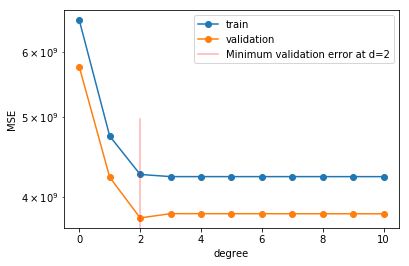

In [67]:
plt.show()

In [68]:
def get_plot():
    d = 2
    X_train = train_dict[d]
    X_validation = validation_dict[d]
    regressor = linear_model.LinearRegression()
    # fitting
    regressor.fit(X_train, y_train)
    prediction_on_training = regressor.predict(X_train)
    prediction_on_validation = regressor.predict(X_validation)
    x_arr = np.linspace(train["YearBuilt"].min(), train["YearBuilt"].max(), num=1000)
    x_arr_poly = PolynomialFeatures(d).fit_transform(x_arr.reshape(-1, 1))
    y_arr = regressor.predict(x_arr_poly)
    # plotting
    plt.scatter(train["YearBuilt"], train["SalePrice"], s=5)
    plt.plot(x_arr, y_arr, 'r-', alpha=0.5, label = "Fit", linewidth=4)
    plt.xlabel('$YearBuilt$');
    plt.ylabel('$SalePrice$')
    plt.legend(loc="upper left")
    plt.show()

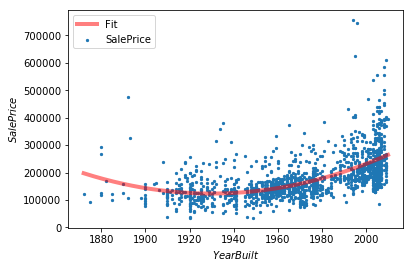

In [69]:
get_plot()

## 隨堂練習：在上圖加入 d=1 與 d=3 的線

In [70]:
def get_plot():
    y_arrays = []
    for d in [1, 2, 3]:
        X_train = train_dict[d]
        X_validation = validation_dict[d]
        regressor = linear_model.LinearRegression()
        #fit
        regressor.fit(X_train, y_train)
        prediction_on_training = regressor.predict(X_train)
        prediction_on_validation = regressor.predict(X_validation)
        x_arr = np.linspace(train["YearBuilt"].min(), train["YearBuilt"].max(), num=1000)
        x_arr_poly = PolynomialFeatures(d).fit_transform(x_arr.reshape(-1, 1))
        y_arr = regressor.predict(x_arr_poly)
        y_arrays.append(y_arr)
    plt.scatter(train["YearBuilt"], train["SalePrice"], s=5)
    plt.plot(x_arr, y_arrays[0], 'r-', alpha=0.5, label = "Degree={}".format(1), linewidth=3)
    plt.plot(x_arr, y_arrays[1], 'g-', alpha=0.5, label = "Degree={}".format(2), linewidth=3)
    plt.plot(x_arr, y_arrays[2], 'm-', alpha=0.5, label = "Degree={}".format(3), linewidth=3)
    plt.xlabel('$YearBuilt$');
    plt.ylabel('$SalePrice$')
    plt.legend(loc="upper left")
    plt.show()

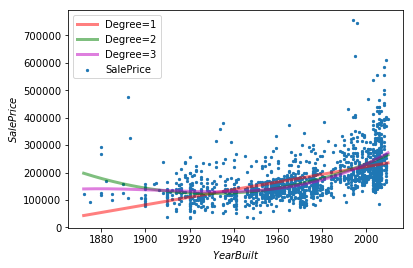

In [71]:
get_plot()

## 在不設定 `random_state` 參數的情況下切割訓練與驗證樣本

In [72]:
# 切割訓練與驗證樣本
train_df, validation_df = train_test_split(train, test_size=0.3)
y_train = train_df["SalePrice"].values.reshape(-1, 1)
X_train = train_df["YearBuilt"].values.reshape(-1, 1)
y_validation = validation_df["SalePrice"].values.reshape(-1, 1)
X_validation = validation_df["YearBuilt"].values.reshape(-1, 1)

PolynomialFeatures(3).fit_transform(X_train)
degrees = range(11)
train_dict, validation_dict = make_features(X_train, X_validation, degrees)

best_degree, error_validation, error_train = get_best_degree()

print("Validation Error:\n")
print(error_validation)
print("\nError 最低的次方是 {}".format(best_degree))

Validation Error:

[7.12015850e+09 5.39652267e+09 4.83958578e+09 4.83518208e+09
 4.83518232e+09 4.83517981e+09 4.83517485e+09 4.83516785e+09
 4.83515923e+09 4.83514946e+09 4.83513908e+09]

Error 最低的次方是 10


In [73]:
plt.plot(degrees, error_train, marker='o', label='train')
plt.plot(degrees, error_validation, marker='o', label='validation')
plt.axvline(best_degree, 0, 0.5, color='r', label="Minimum validation error at d={}".format(best_degree), alpha=0.3)
plt.ylabel('MSE')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

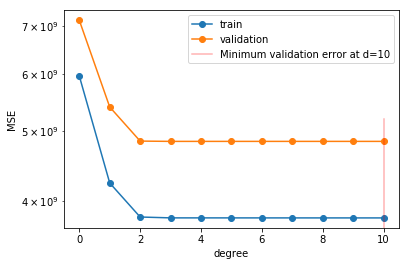

In [74]:
plt.show()

## 重複執行前面的程式碼

- 發現驗證資料的 error_validation 與 best_degree 每次都不一樣，這是什麼緣故？

## 交叉驗證 Cross-Validation

## 隨機的 `train_test_split()`

- 憑藉單次隨機給予模型的訓練、驗證樣本就決定 best_degree 與 MSE 有些大意
- 我們需要一個機制來因應這樣的隨機性

## 交叉驗證示意圖

![](images/train-cv2.png)

Source: [CS109 Data Science](http://cs109.github.io/2015/index.html)

## 交叉驗證的步驟

1. 將 labeled data 切分為 `n_folds`
2. 將 `n_folds - 1` 作為訓練樣本，剩餘的一個 fold 作為驗證樣本
3. 將所有 folds 組合下的 MSE 平均
4. 移動至下一個 degree 然後進行第 3 項
5. 尋找 MSE 平均起來最低的 $d$ 作為 best_degree

In [75]:
from sklearn.model_selection import KFold

n_folds = 4
labeled_data_m = train.shape[0]
kfold = KFold(n_folds)

In [76]:
list(kfold.split(range(labeled_data_m)))[0]

(array([ 365,  366,  367, ..., 1457, 1458, 1459]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,


## 這樣有什麼問題？

In [77]:
kfold = KFold(n_folds, shuffle=True)
list(kfold.split(range(labeled_data_m)))[0]

(array([   0,    5,    7, ..., 1457, 1458, 1459]),
 array([   1,    2,    3,    4,    6,   10,   12,   16,   18,   21,   23,
          33,   41,   53,   54,   58,   60,   62,   68,   69,   74,   78,
          79,   83,   84,   86,   89,   93,   96,  102,  115,  129,  134,
         135,  146,  149,  157,  161,  163,  172,  173,  176,  177,  178,
         181,  184,  185,  191,  193,  195,  202,  214,  215,  218,  228,
         230,  241,  242,  243,  250,  255,  261,  262,  268,  271,  273,
         279,  281,  284,  288,  289,  293,  296,  305,  308,  311,  314,
         317,  325,  327,  330,  334,  336,  339,  346,  347,  348,  349,
         361,  364,  378,  380,  381,  383,  391,  393,  418,  424,  426,
         429,  433,  437,  440,  441,  443,  444,  445,  447,  450,  455,
         457,  458,  462,  471,  478,  479,  488,  489,  491,  493,  495,
         497,  501,  507,  516,  517,  519,  520,  521,  528,  529,  531,
         532,  536,  537,  541,  547,  553,  555,  568,  570,

In [78]:
cv_df = train[["YearBuilt", "SalePrice"]]
cv_x = cv_df["YearBuilt"].values
cv_y = cv_df["SalePrice"].values

In [79]:
def get_cv_errors(n_folds=4, degree=11):
    degrees=range(degree)
    train_errors = np.zeros((degree, n_folds))
    validation_errors = np.zeros((degree, n_folds))
    fold = 0
    labeled_data_m = len(cv_x)
    for train, valid in KFold(n_folds, shuffle=True).split(range(labeled_data_m)):
        train_dict, validation_dict = make_features(cv_x[train], cv_x[valid], degrees)
        for d in degrees:
            regressor = linear_model.LinearRegression()
            regressor.fit(train_dict[d], cv_y[train])
            train_errors[d, fold] = mean_squared_error(cv_y[train], regressor.predict(train_dict[d]))
            validation_errors[d, fold] = mean_squared_error(cv_y[valid], regressor.predict(validation_dict[d]))
        fold += 1
    mean_train_errors = train_errors.mean(axis=1)
    mean_validation_errors = validation_errors.mean(axis=1)
    std_train_errors = train_errors.std(axis=1)
    std_validation_errors = validation_errors.std(axis=1)
    best_degree = np.argmin(mean_validation_errors)
    return mean_train_errors, mean_validation_errors, std_train_errors, std_validation_errors, best_degree

In [80]:
mean_train_errors, mean_validation_errors, std_train_errors, std_validation_errors, best_degree = get_cv_errors()

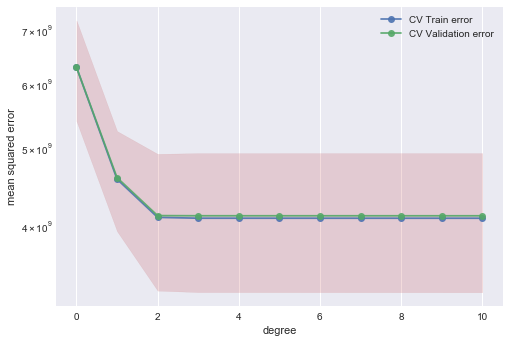

In [81]:
import seaborn as sns

degrees = range(11)
c2 = sns.color_palette()[2]
plt.plot(degrees, mean_train_errors, marker='o', label='CV Train error', alpha=0.9)
plt.plot(degrees, mean_validation_errors, marker='o', label='CV Validation error', alpha=0.9)
plt.fill_between(degrees, mean_validation_errors - std_validation_errors, mean_validation_errors + std_validation_errors, color=c2, alpha=0.2)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")
plt.show()

## 正規化 regularization

## 透過 Cross-Validation 挑選出 Best Degree 已經很酷了

- 但有可能碰上什麼麻煩？

In [82]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]).reshape(-1, 1)
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8]).reshape(-1, 1)

# Fitting
lr = linear_model.LinearRegression()
pr_q = linear_model.LinearRegression()
pr_6 = linear_model.LinearRegression()
quadratic = PolynomialFeatures(degree = 2)
power_of_6 = PolynomialFeatures(degree = 6)
X_quad = quadratic.fit_transform(X)
X_p6 = power_of_6.fit_transform(X)
lr.fit(X, y)
X_fit = np.linspace(250, 600, 100).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)
pr_q.fit(X_quad, y)
y_quad_fit = pr_q.predict(quadratic.fit_transform(X_fit))
pr_6.fit(X_p6, y)
y_p6_fit = pr_6.predict(power_of_6.fit_transform(X_fit))

In [83]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize = (14, 4))
plt.subplot(1, 3, 1)
plt.scatter(X, y)
plt.plot(X_fit, y_lin_fit, linestyle = "--", c = "r")
plt.title("Under-fitting($\\theta_0 + \\theta_1x_1$)")
plt.subplot(1, 3, 2)
plt.scatter(X, y)
plt.plot(X_fit, y_quad_fit, linestyle = "--", c = "r")
plt.title("Appropriate fitting($\\theta_0 + \\theta_1x_1 + \\theta_2x_1^2$)")
plt.subplot(1, 3, 3)
plt.scatter(X, y)
plt.plot(X_fit, y_p6_fit, linestyle = "--", c = "r")
plt.title("Over-fitting($\\theta_0 + \\theta_1x_1 + \\theta_2x_1^2 + ... \\theta_6x_1^6$)")
plt.tight_layout()

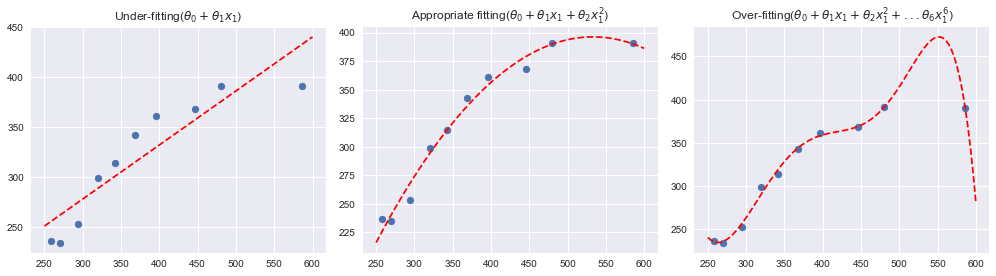

In [84]:
plt.show()

## 過度配適 Overfitting 的麻煩

|Bias|Variance|Fitting|
|----|--------|-------|
|High|Low|Under-fitting|
|Medium|Medium|Appropriate fitting|
|Low|High|Over-fitting|

## 如果我們採用了高的 degrees

- 想個辦法去平滑它：Ridge 方法（$C$ 為一個常數）

$$\sum_{i=0}^d \theta_i^2 < C$$

- 在成本函數後面加入 $\alpha\sum_{i=0}^d \theta_i^2$ 來消弭 $\theta_i$

$$J(\theta)_{Ridge} = \sum_{i=1}^{m}(\hat{y_i}-y_i)^2 + \alpha \sum_{i=0}^d \theta_i^2$$

## 當 $\alpha$ 上升，$\theta_i$ 就有顯著地降低

In [85]:
from sklearn.linear_model import Ridge

fig, axes = plt.subplots(4, 2, figsize=(16, 16))
d = 10
degrees = range(11)
alphas = [10**2, 10**4, 10**6, 10**8]
train_df, validation_df = train_test_split(train, test_size=0.3, random_state=123)
x_train = train_df["YearBuilt"].values
x_validation = validation_df["YearBuilt"].values
y_train = train_df["SalePrice"].values
y_validation = validation_df["SalePrice"].values
train_dict, validation_dict = make_features(x_train, x_validation, degrees)
X_train = train_dict[d]
X_validation = validation_dict[d]
for i, alpha in enumerate(alphas):
    regressor = Ridge(alpha=alpha)
    regressor.fit(X_train, y_train.reshape(-1, 1))
    axes[i, 0].plot(x_train, y_train, 's', alpha=0.4, label="train")
    axes[i, 0].plot(x_validation, y_validation, 's', alpha=0.6, label="validation")
    x_arr = np.linspace(train["YearBuilt"].min(), train["YearBuilt"].max(), 100)
    X_arr_poly = PolynomialFeatures(d).fit_transform(x_arr.reshape(-1,1))
    axes[i, 0].plot(x_arr, regressor.predict(X_arr_poly), linewidth=5, alpha=0.5, label="alpha = {}".format((alpha)))
    axes[i, 0].set_ylabel('y')
    axes[i, 0].set_xlabel('x')
    axes[i, 0].legend(loc='upper right')
    coef = regressor.coef_.ravel()
    axes[i, 1].semilogy(np.abs(coef), marker='o', label="alpha = {}".format((alpha)))
    axes[i, 1].axhline(y=1, linestyle="dashed", linewidth=2, color="r")
    axes[i, 1].set_ylim((1e-5, 1e5))
    axes[i, 1].set_ylabel('abs(coefficient)')
    axes[i, 1].set_xlabel('coefficients')
    axes[i, 1].legend(loc='upper right')

/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.409490231809535e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.4333206634799024e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.4828581283208688e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: sci

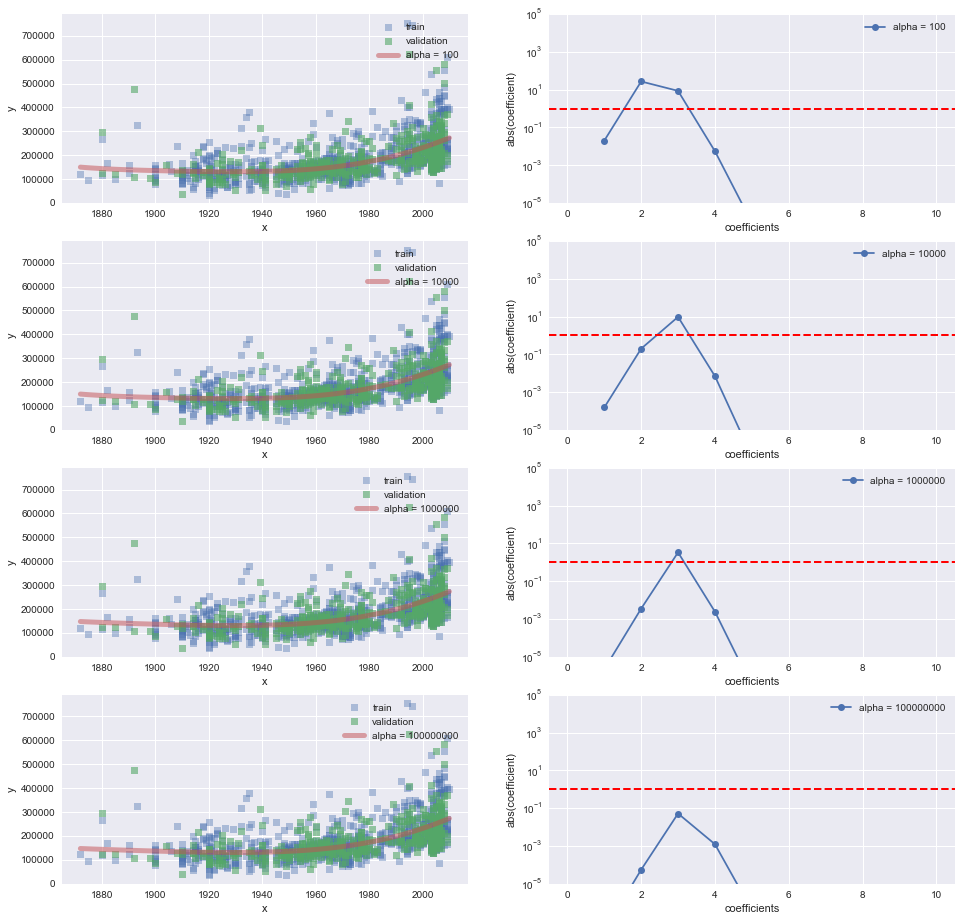

In [86]:
plt.show()

## 那我們又該如何找到合適的 $\alpha$ 呢？

## 網格搜尋 GridSearch

## `GridSearchCV()` 函數

- 能夠幫助我們挑選 **Hyper Parameters**
- 整合了交叉驗證

```python
from sklearn.model_selection import GridSearchCV

regressor = Ridge()
parameters = {"alpha": [1, 10, 10**2, 10**3, 10**4, 10**5]}
gridclassifier=GridSearchCV(regressor, param_grid=parameters, cv=4, scoring="mean_squared_error")
```

In [87]:
from sklearn.model_selection import GridSearchCV

def cv_optimize_ridge(X, y, n_folds=4):
    regressor = Ridge()
    parameters = {"alpha": [1, 10, 10**2, 10**3, 10**4, 10**5]}
    gs = GridSearchCV(regressor, param_grid=parameters, cv=n_folds, scoring="neg_mean_squared_error")
    gs.fit(X, y)
    return gs

In [88]:
fit_model = cv_optimize_ridge(X_train, y_train, n_folds=4)

/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1757601158347515e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.477015291304581e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.36780207886664e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy

In [89]:
print(fit_model.best_estimator_)
print(fit_model.best_params_)
print(fit_model.best_score_)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
{'alpha': 10}
-4327149574.406797


In [90]:
best_alpha = fit_model.best_params_['alpha']
regressor = Ridge(alpha=best_alpha).fit(X_train,y_train)

/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.3859929760336687e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(x_train, y_train, 's', alpha=0.4, label="train")
axes[0].plot(x_validation, y_validation, 's', alpha=0.6, label="validation")
axes[0].plot(x_arr, regressor.predict(X_arr_poly), linewidth=5, alpha=0.5, label="alpha = {}".format((best_alpha)))
axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[0].legend(loc='upper left')
coef = regressor.coef_.ravel()
axes[1].semilogy(np.abs(coef), marker='o', label="alpha = {}".format((best_alpha)))
axes[1].axhline(y=1, linestyle="dashed", linewidth=2, color="r")
axes[1].set_ylim((1e-5, 1e5))
axes[1].set_ylabel('abs(coefficient)')
axes[1].set_xlabel('coefficients')
axes[1].legend(loc='upper right')

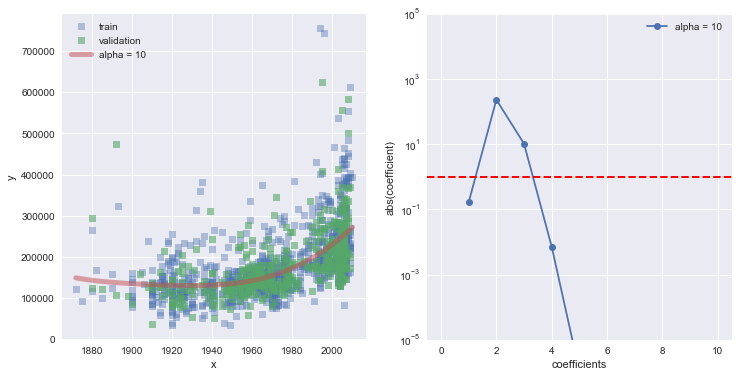

In [92]:
plt.show()